In [73]:
import os
import pandas as pd
from scipy import optimize
from scipy.optimize import leastsq
import numpy as np
import matplotlib.pyplot as plt
import datetime
import numpy as np
import math
import seaborn as sns

In [ ]:
#This code uses the files from patient 0 (S0.txt, A0.txt, H0.txt and L0.txt)
#this can be downloaded from the webpage mentioned in the report (Walch et al., 2019)


In [74]:
def activity_func(x, a, b):
    return a * np.cos(b * x)

In [75]:
def round_to_30s(x, base=30):
    return base * round(x/base)

In [76]:
#patient steps with time and cos

path = "."
#path = "/Users/Chloe/City, University of London/PG-Lopez, Damien - INM701/MHCD/steps"
filename_read = os.path.join(path, "S0.txt")
patient_0_steps = pd.read_csv(filename_read, sep=",", header=None, names=["time", "steps"])
    
#round time to nearest 30 second
for i, j in patient_0_steps.iterrows():
    patient_0_steps['time'][i] = round_to_30s(patient_0_steps['time'][i])
    
#convert timestamp to UNIX, seconds since January 1, 1970
time_column = pd.to_datetime(patient_0_steps['time'], unit='s')
patient_0_steps.insert(0, 'datetime', time_column)
patient_0_steps.set_index('datetime', inplace=True, drop=True)
 
#fit cosine wave to steps
param, param_covariance = optimize.curve_fit(activity_func, patient_0_steps['time'], patient_0_steps['steps'], p0=[2, 2])
cos_func = activity_func(patient_0_steps['time'], param[0], param[1])
patient_0_steps.insert(2, 'cos_func_steps', cos_func)


In [77]:
patient_0_steps

,time,steps,cos_func_steps
datetime,,,
1969-12-25 00:04:30,-604530,0,17.053128
1969-12-25 00:14:30,-603930,0,16.489880
1969-12-25 00:24:30,-603330,0,15.801048
1969-12-25 00:34:30,-602730,0,14.991879
1969-12-25 00:44:30,-602130,0,14.068535
...,...,...,...
1970-01-03 17:04:30,234270,0,-17.759921
1970-01-03 17:14:30,234870,0,-17.939839
1970-01-03 17:24:30,235470,0,-17.983132


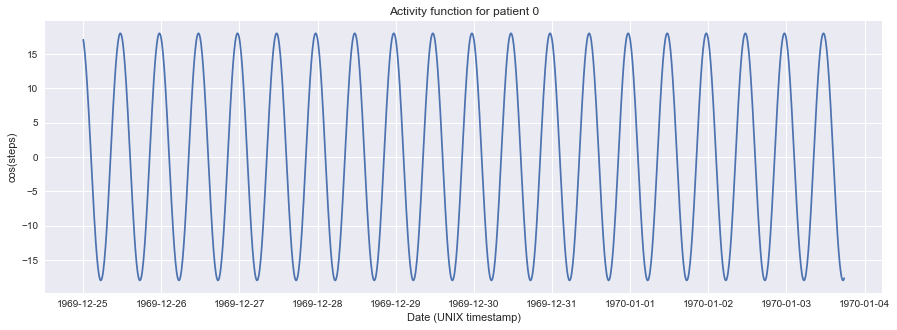

In [78]:
plt.style.use('seaborn')
plt.figure(figsize=(15, 5))
plt.plot(patient_0_steps['cos_func_steps'])
plt.title('Activity function for patient 0')
plt.ylabel('cos(steps)')
plt.xlabel('Date (UNIX timestamp)')
plt.show()

In [79]:
#create new dataframe with rows every 30s and empty cos steps column
time_30s = np.arange(-604530, 236700, 30)
df_30s = pd.DataFrame(time_30s, columns=['time'])
time_column = pd.to_datetime(df_30s['time'], unit='s')
df_30s.insert(0, 'datetime', time_column)
df_30s.set_index('datetime', inplace=True, drop=True)
df_30s.insert(1, 'cos_func_steps', np.nan)


In [80]:
df_30s

,time,cos_func_steps
datetime,,
1969-12-25 00:04:30,-604530,NaN
1969-12-25 00:05:00,-604500,NaN
1969-12-25 00:05:30,-604470,NaN
1969-12-25 00:06:00,-604440,NaN
1969-12-25 00:06:30,-604410,NaN
...,...,...
1970-01-03 17:42:30,236550,NaN
1970-01-03 17:43:00,236580,NaN
1970-01-03 17:43:30,236610,NaN


In [81]:
patient_0_steps.drop(['steps'], axis=1)

,time,cos_func_steps
datetime,,
1969-12-25 00:04:30,-604530,17.053128
1969-12-25 00:14:30,-603930,16.489880
1969-12-25 00:24:30,-603330,15.801048
1969-12-25 00:34:30,-602730,14.991879
1969-12-25 00:44:30,-602130,14.068535
...,...,...
1970-01-03 17:04:30,234270,-17.759921
1970-01-03 17:14:30,234870,-17.939839
1970-01-03 17:24:30,235470,-17.983132


In [82]:
#replace df_30s with rows from patient_0_steps cos(steps) data
df_30s.loc[df_30s.time.isin(patient_0_steps.time), ['cos_func_steps']] = patient_0_steps[['cos_func_steps']]
 


In [83]:
df_30s[:41]

,time,cos_func_steps
datetime,,
1969-12-25 00:04:30,-604530,17.053128
1969-12-25 00:05:00,-604500,NaN
1969-12-25 00:05:30,-604470,NaN
1969-12-25 00:06:00,-604440,NaN
1969-12-25 00:06:30,-604410,NaN
1969-12-25 00:07:00,-604380,NaN
1969-12-25 00:07:30,-604350,NaN
1969-12-25 00:08:00,-604320,NaN
1969-12-25 00:08:30,-604290,NaN


In [84]:
#interpolate cos for rest of data
df_30s['cos_func_steps'] = df_30s['cos_func_steps'].interpolate(method='polynomial', order=2)

In [85]:
df_30s

,time,cos_func_steps
datetime,,
1969-12-25 00:04:30,-604530,17.053128
1969-12-25 00:05:00,-604500,17.027966
1969-12-25 00:05:30,-604470,17.002488
1969-12-25 00:06:00,-604440,16.976694
1969-12-25 00:06:30,-604410,16.950585
...,...,...
1970-01-03 17:42:30,236550,-17.716432
1970-01-03 17:43:00,236580,-17.702725
1970-01-03 17:43:30,236610,-17.688677


In [86]:
path = "."
#path = "/Users/Chloe/City, University of London/PG-Lopez, Damien - INM701/MHCD/heart_rate"
filename_read = os.path.join(path, "H0.txt")
patient_0_heartbeat = pd.read_csv(filename_read, sep=",", header=None, names=["time", "heartbeat"])
patient_0_heartbeat['time'] = patient_0_heartbeat['time'].round(decimals=-1)
for i, j in patient_0_heartbeat.iterrows():
    patient_0_heartbeat['time'][i] = round_to_30s(patient_0_heartbeat['time'][i])
patient_0_heartbeat = patient_0_heartbeat.drop_duplicates(subset='time', keep='first', inplace=False)
time_column = pd.to_datetime(patient_0_heartbeat['time'], unit='s')
patient_0_heartbeat.insert(0, 'datetime', time_column)
patient_0_heartbeat.set_index('datetime', inplace=True, drop=True)


/Users/Chloe/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [87]:
patient_0_heartbeat

,time,heartbeat
datetime,,
1969-12-25 13:26:30,-556410.0,57
1969-12-25 13:27:00,-556380.0,59
1969-12-25 13:30:30,-556170.0,61
1969-12-25 13:44:30,-555330.0,98
1969-12-25 13:53:00,-554820.0,90
...,...,...
1970-01-01 04:41:00,16860.0,75
1970-01-01 04:41:30,16890.0,75
1970-01-01 04:42:00,16920.0,77


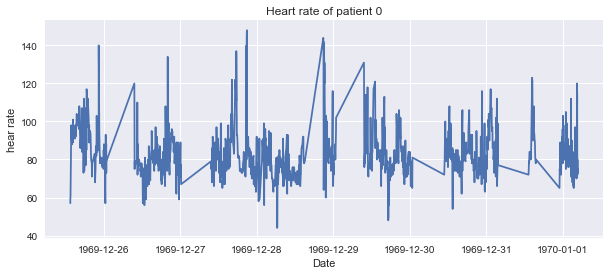

In [88]:
plt.figure(figsize=(10, 4))
plt.plot(patient_0_heartbeat['heartbeat'])
plt.title('Heart rate of patient 0')
plt.xlabel('Date')
plt.ylabel('hear rate')
plt.show()

In [89]:
#add empty column 
df_30s.insert(2, 'heartbeat', np.nan)

In [90]:
df_30s

,time,cos_func_steps,heartbeat
datetime,,,
1969-12-25 00:04:30,-604530,17.053128,NaN
1969-12-25 00:05:00,-604500,17.027966,NaN
1969-12-25 00:05:30,-604470,17.002488,NaN
1969-12-25 00:06:00,-604440,16.976694,NaN
1969-12-25 00:06:30,-604410,16.950585,NaN
...,...,...,...
1970-01-03 17:42:30,236550,-17.716432,NaN
1970-01-03 17:43:00,236580,-17.702725,NaN
1970-01-03 17:43:30,236610,-17.688677,NaN


In [91]:
df_30s.loc[df_30s.time.isin(patient_0_heartbeat.time), ['heartbeat']] = patient_0_heartbeat[['heartbeat']]


In [92]:
df_30s

,time,cos_func_steps,heartbeat
datetime,,,
1969-12-25 00:04:30,-604530,17.053128,NaN
1969-12-25 00:05:00,-604500,17.027966,NaN
1969-12-25 00:05:30,-604470,17.002488,NaN
1969-12-25 00:06:00,-604440,16.976694,NaN
1969-12-25 00:06:30,-604410,16.950585,NaN
...,...,...,...
1970-01-03 17:42:30,236550,-17.716432,NaN
1970-01-03 17:43:00,236580,-17.702725,NaN
1970-01-03 17:43:30,236610,-17.688677,NaN


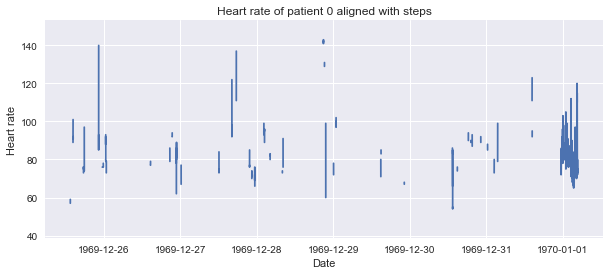

In [93]:
plt.figure(figsize=(10, 4))
plt.plot(df_30s['heartbeat'])
plt.title('Heart rate of patient 0 aligned with steps')
plt.xlabel('Date')
plt.ylabel('Heart rate')
plt.show()

In [94]:
df_30s['heartbeat'] = df_30s['heartbeat'].interpolate()

In [95]:
df_30s

,time,cos_func_steps,heartbeat
datetime,,,
1969-12-25 00:04:30,-604530,17.053128,NaN
1969-12-25 00:05:00,-604500,17.027966,NaN
1969-12-25 00:05:30,-604470,17.002488,NaN
1969-12-25 00:06:00,-604440,16.976694,NaN
1969-12-25 00:06:30,-604410,16.950585,NaN
...,...,...,...
1970-01-03 17:42:30,236550,-17.716432,75.0
1970-01-03 17:43:00,236580,-17.702725,75.0
1970-01-03 17:43:30,236610,-17.688677,75.0


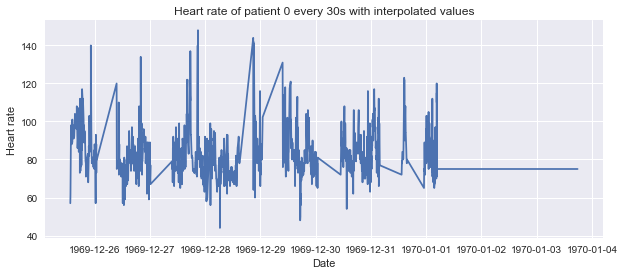

In [96]:
plt.figure(figsize=(10, 4))
plt.plot(df_30s['heartbeat'])
plt.title('Heart rate of patient 0 every 30s with interpolated values')
plt.xlabel('Date')
plt.ylabel('Heart rate')
plt.show()

In [97]:
#drop time and nan
df_30s = df_30s.drop(['time'], axis=1)
df_30s = df_30s.dropna()


In [98]:
#create two separate df's of before and during the sleep study
patient0_study = df_30s.loc['1970-01-01 00:00:00':,:]
df_30s = df_30s.loc[:'1970-01-01 00:00:00',:]

In [99]:
df_30s

,cos_func_steps,heartbeat
datetime,,
1969-12-25 13:26:30,9.083417,57.000000
1969-12-25 13:27:00,9.015583,59.000000
1969-12-25 13:27:30,8.947570,59.285714
1969-12-25 13:28:00,8.879380,59.571429
1969-12-25 13:28:30,8.811011,59.857143
...,...,...
1969-12-31 23:58:00,17.199625,86.000000
1969-12-31 23:58:30,17.176503,87.000000
1969-12-31 23:59:00,17.153051,82.000000


In [100]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df_30s = scaler.fit_transform(df_30s)

In [101]:
#split 80% train, 20% test
msk = int(len(df_30s) * 0.8)
df_train = df_30s[0:msk,:]
df_test = df_30s[msk:len(df_30s), :]

In [102]:
print(df_train.shape)
print(df_test.shape)

(14838, 2)
(3710, 2)


In [103]:
#reshape data to (samples, time-steps, features)

def to_sequences(seq_size, obs):
    x = []
    y = []
    for i in range(len(obs)-seq_size-1):
        window = obs[i:(i+seq_size), :]
        after_window = obs[i+seq_size, 0]
        x.append(window)
        y.append(after_window)  
    return np.array(x), np.array(y)

    
seq_size = 10
X_train,y_train = to_sequences(seq_size,df_train)
X_test,y_test = to_sequences(seq_size,df_test)



In [104]:
print("Shape of training set: {}".format(X_train.shape))
print("Shape of test set: {}".format(X_test.shape))

Shape of training set: (14827, 10, 2)
Shape of test set: (3699, 10, 2)


In [105]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(LSTM(64, input_shape=(seq_size, 2)))
model.add(Dense(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                17152     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 19,265
Trainable params: 19,265
Non-trainable params: 0
_________________________________________________________________


In [106]:
model_fit = model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)

Train on 14827 samples, validate on 3699 samples
Epoch 1/1000
 - 4s - loss: 0.0025 - val_loss: 5.2862e-05
Epoch 2/1000
 - 3s - loss: 4.3255e-05 - val_loss: 4.4227e-05
Epoch 3/1000
 - 3s - loss: 3.7043e-05 - val_loss: 5.2566e-05
Epoch 4/1000
 - 3s - loss: 3.4763e-05 - val_loss: 3.6605e-05
Epoch 5/1000
 - 3s - loss: 3.1350e-05 - val_loss: 3.8015e-05
Epoch 6/1000
 - 3s - loss: 2.8500e-05 - val_loss: 3.5427e-05
Epoch 00006: early stopping


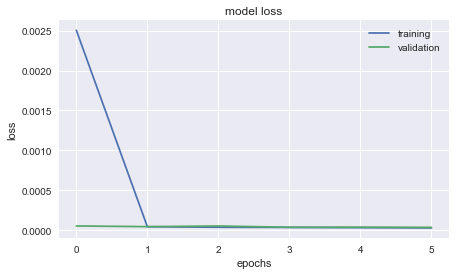

In [107]:
plt.figure(figsize=(7, 4))
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [108]:
from sklearn import metrics

pred = model.predict(X_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))
print("Mean activity: {}".format(np.mean(X_train)))

Score (RMSE): 0.00595204345945279
Mean activity: 0.45080899537383473


In [109]:
sp = []
for p in pred:
    sp.append(p[0])

df_pred = pd.DataFrame(sp)

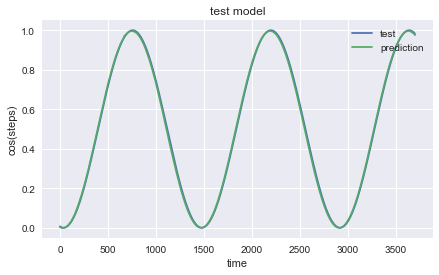

In [110]:
plt.figure(figsize=(7, 4))
plt.plot(X_test[:,0,0])
plt.plot(df_pred)
plt.title('test model')
plt.ylabel('cos(steps)')
plt.xlabel('time')
plt.legend(['test', 'prediction'], loc='upper right')
plt.show()

In [111]:
#change time to hours
time_hours = np.arange(0,3699) * 0.004166667

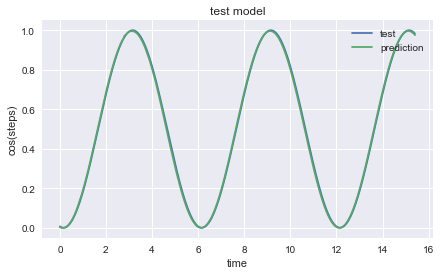

In [112]:
plt.figure(figsize=(7, 4))
plt.plot(time_hours, X_test[:,0,0])
plt.plot(time_hours, df_pred)
plt.title('test model')
plt.ylabel('cos(steps)')
plt.xlabel('time')
plt.legend(['test', 'prediction'], loc='upper right')
plt.show()

In [113]:
#use model to predict cos(steps) during sleep study

scaler = MinMaxScaler(feature_range=(0, 1))
patient0_study = scaler.fit_transform(patient0_study)

In [114]:

def to_sequences(seq_size, obs):
    x = []
    y = []
    for i in range(len(obs)-seq_size-1):
        window = obs[i:(i+seq_size), :]
        after_window = obs[i+seq_size, 0]
        x.append(window)
        y.append(after_window)  
    return np.array(x), np.array(y)

    
seq_size = 10
study_X, study_y = to_sequences(seq_size, patient0_study)


In [115]:
pred_study = model.predict(study_X)

In [116]:
sp = []
for p in pred_study:
    sp.append(p[0])

df_pred_study = pd.DataFrame(sp)

In [117]:
time_hours2 = np.arange(0,7879) * 0.004166667

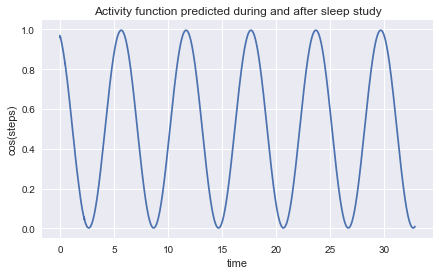

In [118]:
plt.figure(figsize=(7, 4))
plt.plot(time_hours2, df_pred_study)
plt.title('Activity function predicted during and after sleep study')
plt.ylabel('cos(steps)')
plt.xlabel('time')
plt.show()

In [130]:
path = "."
#path = "/Users/Chloe/City, University of London/PG-Lopez, Damien - INM701/MHCD/motion"
filename_read = os.path.join(path, "A0.txt")
patient_0_accel = pd.read_csv(filename_read, sep=" ", header=None, names=["time", "x", "y", "z"])
# round time to nearest whole number
patient_0_accel['time'] = patient_0_accel['time'].round(decimals=-1)
# only every 30s
patient_0_accel = patient_0_accel.loc[patient_0_accel['time'] % 30 == 0]
# remove duplicates, keep first
patient_0_accel = patient_0_accel.drop_duplicates(subset='time', keep='first', inplace=False)

path ="."
#path = "/Users/Chloe/City, University of London/PG-Lopez, Damien - INM701/MHCD/heart_rate"
filename_read = os.path.join(path, "H0.txt")
patient_0_heartbeat = pd.read_csv(filename_read, sep=",", header=None, names=["time", "heartbeat"])
patient_0_heartbeat['time'] = patient_0_heartbeat['time'].round(decimals=-1)
patient_0_heartbeat = patient_0_heartbeat.loc[patient_0_heartbeat['time'] % 30 == 0]
patient_0_heartbeat = patient_0_heartbeat.drop_duplicates(subset='time', keep='first', inplace=False)

path = "."
#path = "/Users/Chloe/City, University of London/PG-Lopez, Damien - INM701/MHCD/labels"
filename_read = os.path.join(path, "L0.txt")
patient_0_label = pd.read_csv(filename_read, sep=" ", header=None, names=["time", "label"])

# merge dataframes
patient_0_all = pd.merge(pd.merge(patient_0_accel, patient_0_heartbeat, on='time'), patient_0_label,
                                on='time')
   

In [131]:
patient_0_all

,time,x,y,z,heartbeat,label
0,0.0,0.184021,0.679169,-0.476990,87,-1
1,30.0,-0.301010,0.805710,0.487167,95,-1
2,60.0,-0.323517,0.923447,0.146362,84,-1
3,90.0,-0.509674,0.855102,-0.049118,85,-1
4,120.0,-0.387756,0.919067,0.023758,82,-1
...,...,...,...,...,...,...
562,16860.0,-0.442429,-0.526566,0.725388,76,0
563,16890.0,-0.441437,-0.525116,0.723434,77,0
564,16920.0,-0.442917,-0.524612,0.724884,75,0
565,16950.0,-0.439972,-0.524612,0.723450,73,0


In [132]:
patient_0_all.insert(6, 'LSTM_pred', df_pred_study[:567])

In [133]:
patient_0_all

,time,x,y,z,heartbeat,label,LSTM_pred
0,0.0,0.184021,0.679169,-0.476990,87,-1,0.968843
1,30.0,-0.301010,0.805710,0.487167,95,-1,0.968061
2,60.0,-0.323517,0.923447,0.146362,84,-1,0.965418
3,90.0,-0.509674,0.855102,-0.049118,85,-1,0.965085
4,120.0,-0.387756,0.919067,0.023758,82,-1,0.964632
...,...,...,...,...,...,...,...
562,16860.0,-0.442429,-0.526566,0.725388,76,0,0.030977
563,16890.0,-0.441437,-0.525116,0.723434,77,0,0.030244
564,16920.0,-0.442917,-0.524612,0.724884,75,0,0.029522
565,16950.0,-0.439972,-0.524612,0.723450,73,0,0.028755


In [134]:
time_hours3 = np.arange(0,567) * 0.004166667

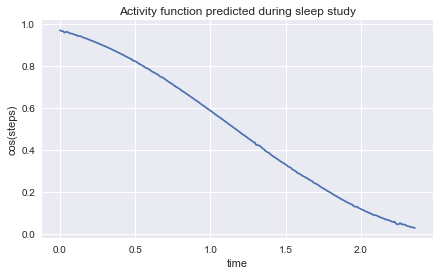

In [135]:
plt.figure(figsize=(7, 4))
plt.plot(time_hours3, patient_0_all['LSTM_pred'])
plt.title('Activity function predicted during sleep study')
plt.ylabel('cos(steps)')
plt.xlabel('time')
plt.show()

In [136]:
import math
cos_time = 0.5 *np.cos((math.pi*2/24)*(patient_0_all['time']/60/60)) + 0.5

In [137]:
patient_0_all.insert(7, 'cos_time', cos_time)

In [138]:
patient_0_all

,time,x,y,z,heartbeat,label,LSTM_pred,cos_time
0,0.0,0.184021,0.679169,-0.476990,87,-1,0.968843,1.000000
1,30.0,-0.301010,0.805710,0.487167,95,-1,0.968061,0.999999
2,60.0,-0.323517,0.923447,0.146362,84,-1,0.965418,0.999995
3,90.0,-0.509674,0.855102,-0.049118,85,-1,0.965085,0.999989
4,120.0,-0.387756,0.919067,0.023758,82,-1,0.964632,0.999981
...,...,...,...,...,...,...,...,...
562,16860.0,-0.442429,-0.526566,0.725388,76,0,0.030977,0.668958
563,16890.0,-0.441437,-0.525116,0.723434,77,0,0.030244,0.667931
564,16920.0,-0.442917,-0.524612,0.724884,75,0,0.029522,0.666903
565,16950.0,-0.439972,-0.524612,0.723450,73,0,0.028755,0.665875


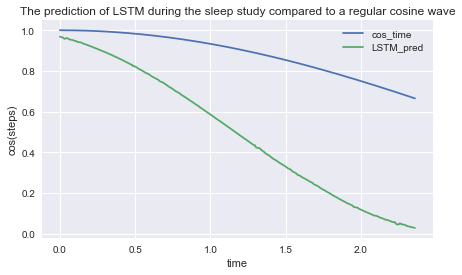

In [139]:
#this figure compares the LSTM prediction to a regular cosine wave with a period of 24 hours
plt.figure(figsize=(7, 4))
plt.plot(time_hours3, patient_0_all['cos_time'])
plt.plot(time_hours3, patient_0_all['LSTM_pred'])
plt.title('The prediction of LSTM during the sleep study compared to a regular cosine wave')
plt.ylabel('cos(steps)')
plt.xlabel('time')
plt.legend(['cos_time', 'LSTM_pred'], loc='upper right')
plt.show()